In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "paneldata"

### **Project Scope**

This project involves analyzing a panel dataset obtained from the NYU Stern School of Business, Econometric Analysis, 5th Edition. The dataset consists of cost data for US airlines from 1970 to 1984, encompassing 15 years. There are a total of 90 observations on 6 different airline firms.

The following key aspects are included in the project:

### **Data Description:**

The dataset is a panel structure, combining cross-sectional data over time.

It includes observations for 6 airlines over 15 years (1970-1984).

Six variables are present:

I (Airline): Categorical variable representing different airline firms.

T (Year): Numerical variable indicating the year of observation.

PF (Fuel Price): Numerical variable representing the average global price of aviation jet fuel.

LF (Load Factor): Numerical variable representing the average capacity utilization of the airline fleet.

Q (Revenue Passenger Miles): Numerical variable representing the number of miles traveled by paying passengers.

Cost: Numerical variable (in $1000) representing the total cost incurred by the airline.


### **Data Analysis Goals:**

The specific goals of the project will be determined further, but potential areas of exploration include:

Investigating the relationship between fuel price and airline costs.

Analyzing how load factor impacts airline costs.

Examining the effect of output (revenue passenger miles) on costs.

Modeling the cost structure of airlines using the provided data.

In [2]:
airlines_data <- read.csv('../input/paneldata/PanelData.csv')

In [3]:
glimpse(airlines_data)

Rows: 90
Columns: 6
$ I  <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2…
$ T  <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1, 2, 3, 4, 5, 6…
$ C  <int> 1140640, 1215690, 1309570, 1511530, 1676730, 1823740, 2022890, 2314…
$ Q  <dbl> 0.952757, 0.986757, 1.091980, 1.175780, 1.160170, 1.173760, 1.29051…
$ PF <int> 106650, 110307, 110574, 121974, 196606, 265609, 263451, 316411, 384…
$ LF <dbl> 0.534487, 0.532328, 0.547736, 0.540846, 0.591167, 0.575417, 0.59449…


##### Summarizing the data using summary function to understand the descriptive stats of the data

In [4]:
summary(airlines_data)

       I             T            C                 Q          
 Min.   :1.0   Min.   : 1   Min.   :  68978   Min.   :0.03768  
 1st Qu.:2.0   1st Qu.: 4   1st Qu.: 292046   1st Qu.:0.14213  
 Median :3.5   Median : 8   Median : 637001   Median :0.30503  
 Mean   :3.5   Mean   : 8   Mean   :1122524   Mean   :0.54499  
 3rd Qu.:5.0   3rd Qu.:12   3rd Qu.:1345968   3rd Qu.:0.94528  
 Max.   :6.0   Max.   :15   Max.   :4748320   Max.   :1.93646  
       PF                LF        
 Min.   : 103795   Min.   :0.4321  
 1st Qu.: 129848   1st Qu.:0.5288  
 Median : 357434   Median :0.5661  
 Mean   : 471683   Mean   :0.5605  
 3rd Qu.: 849840   3rd Qu.:0.5947  
 Max.   :1015610   Max.   :0.6763  

In [5]:
# checking if there are any null values in the dataset
NROW(na.omit(airlines_data))

[1] 90

In [6]:
# Checking if the panel data is balanced or unbalanced
# Since each airlines has 15 values associated with it, it is a perfectly balanced panel data
airlines_data %>% count(I)

I,n
<int>,<int>
1,15
2,15
3,15
4,15
5,15
6,15


In [7]:
# Performing correlation analysis on the variables to test for the relationships between them
airlines_data_corr <- cor(airlines_data)
airlines_data_corr

,I,T,C,Q,PF,LF
I,1.00000000,0.0000000,-0.7086242,-0.8679359,0.01329393,-0.3399570
T,0.00000000,1.0000000,0.5000271,0.2711141,0.93118760,0.6001491
C,-0.70862418,0.5000271,1.0000000,0.9263269,0.47904374,0.4143377
Q,-0.86793588,0.2711141,0.9263269,1.0000000,0.22761248,0.4248100
PF,0.01329393,0.9311876,0.4790437,0.2276125,1.00000000,0.4867001
LF,-0.33995702,0.6001491,0.4143377,0.4248100,0.48670012,1.0000000


From the correlation plot, 

we can infer that there is a strong negative relationship between airlines type and Revenue Passenger Miles(-0.86).  

There is a strong positive relationship between cost and revenue passenger miles(0.92).

Strong positive relationship between year and Fuel price, Can be infered as it happens because of inflation.

corrplot 0.92 loaded



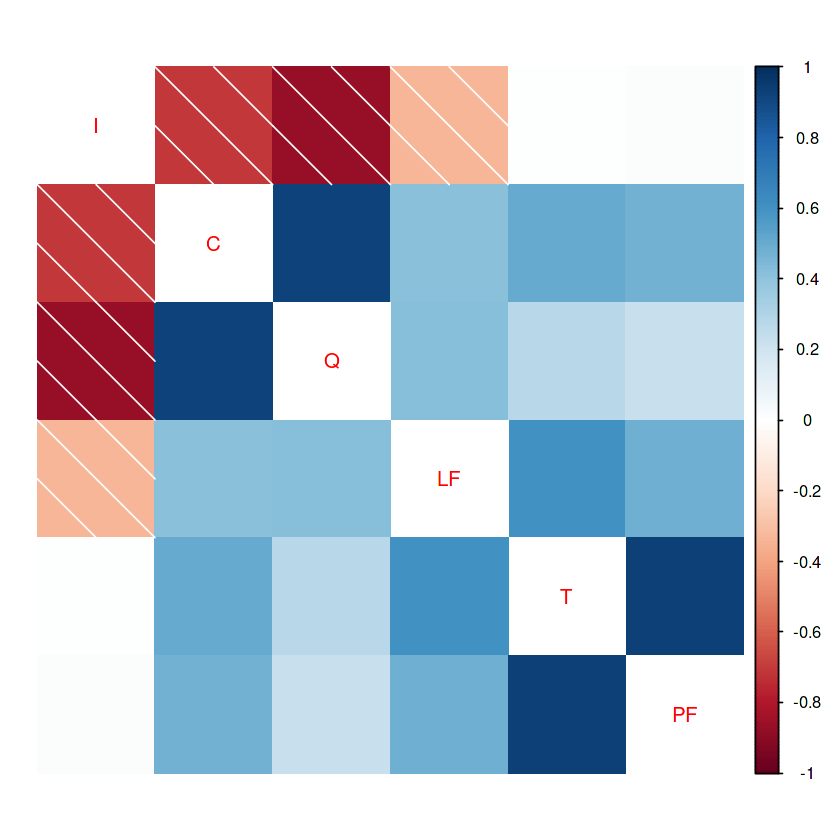

In [8]:
library(corrplot)
corrplot.mixed(airlines_data_corr, lower = 'shade', upper = 'shade', order = 'hclust')

### Heterogenity

Heterogeneity in panel data refers to the situation where the relationships between variables or the model parameters differ across the individual units (entities) in the panel.  Panel data typically consists of observations for the same units (e.g., countries, firms) over multiple time periods. While this structure offers advantages over pure cross-sectional or time series data, heterogeneity can pose challenges for analysis if not addressed properly.

Here's a breakdown of heterogeneity in panel data:

###  Types of Heterogeneity: 

##### Unobserved heterogeneity:

There might be unobserved characteristics of the units that influence the variables of interest. These characteristics are not directly included in the model but can affect the results.

##### Observed heterogeneity:

This occurs when relevant characteristics that differ across units are included as explanatory variables in the model.

###  Impact of Heterogeneity: 

Ignoring heterogeneity can lead to biased and inefficient estimates. The model might not accurately capture the true relationships between variables.
Failing to account for unit-specific effects can mask important insights about how the model works for different entities.

In [9]:
library(gplots)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




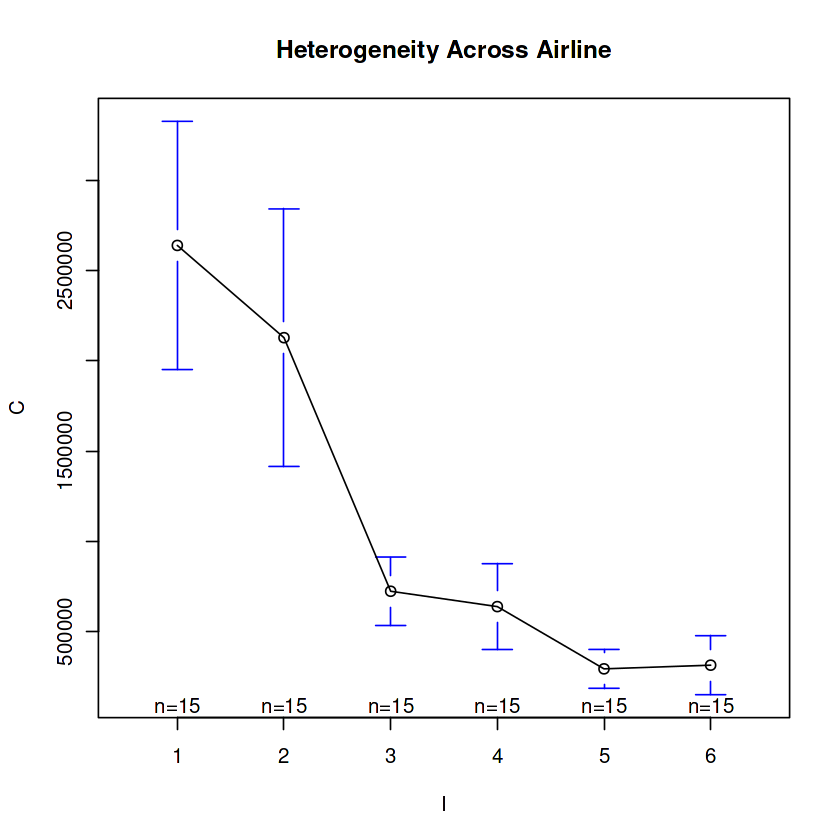

In [10]:
plotmeans(C~I , main = 'Heterogeneity Across Airline', data = airlines_data)

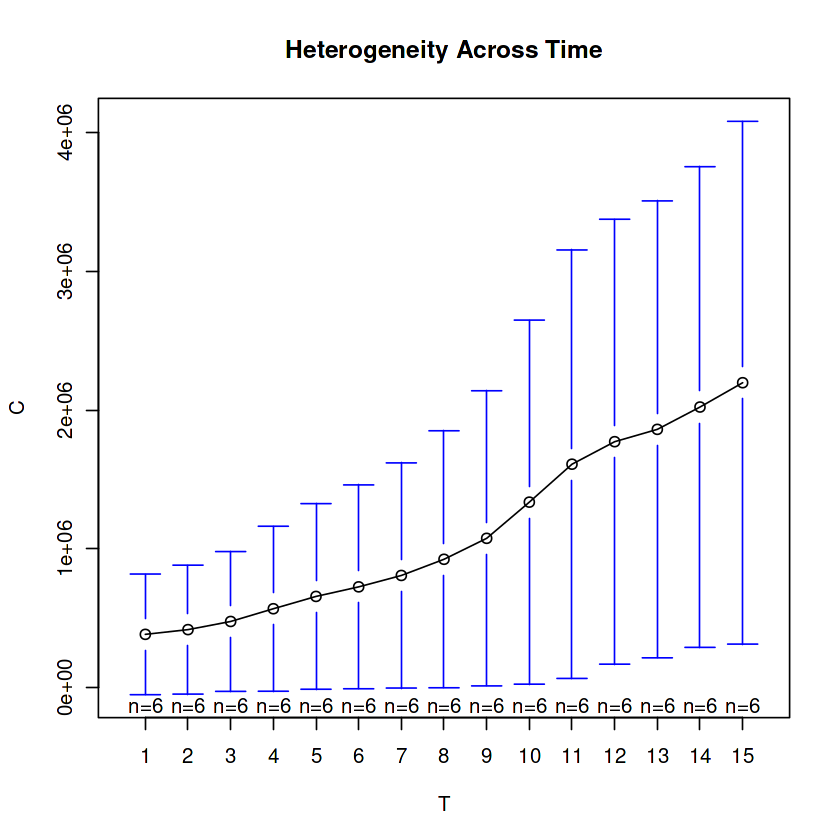

In [11]:
plotmeans(C~T , main = 'Heterogeneity Across Time', data = airlines_data)

From the heterogenity graphs, we can infer that heterogenity in cost of airlines is highest in airline 1 and lowest in airline 5

Heterogenity across time, we can infer that heterogenity in cost of airlines increases as the time passes, due to various factors like load factors, fuel prices

### Visulaizations

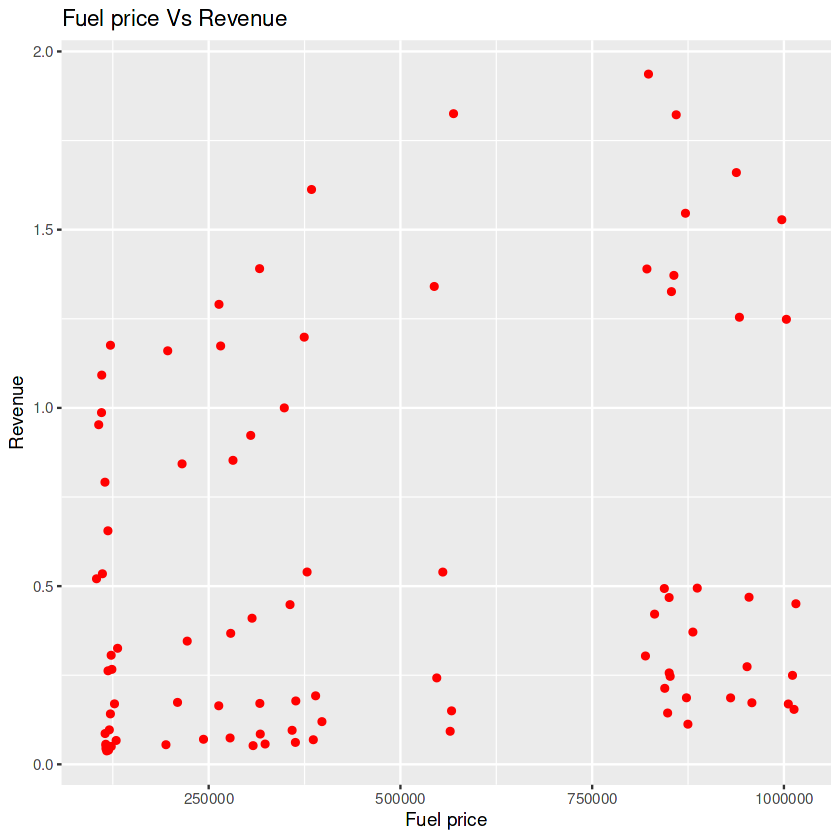

In [12]:
ggplot() + geom_point(aes(airlines_data$PF, airlines_data$Q),colour = 'red') + ggtitle('Fuel price Vs Revenue') + 
xlab('Fuel price') + ylab('Revenue')

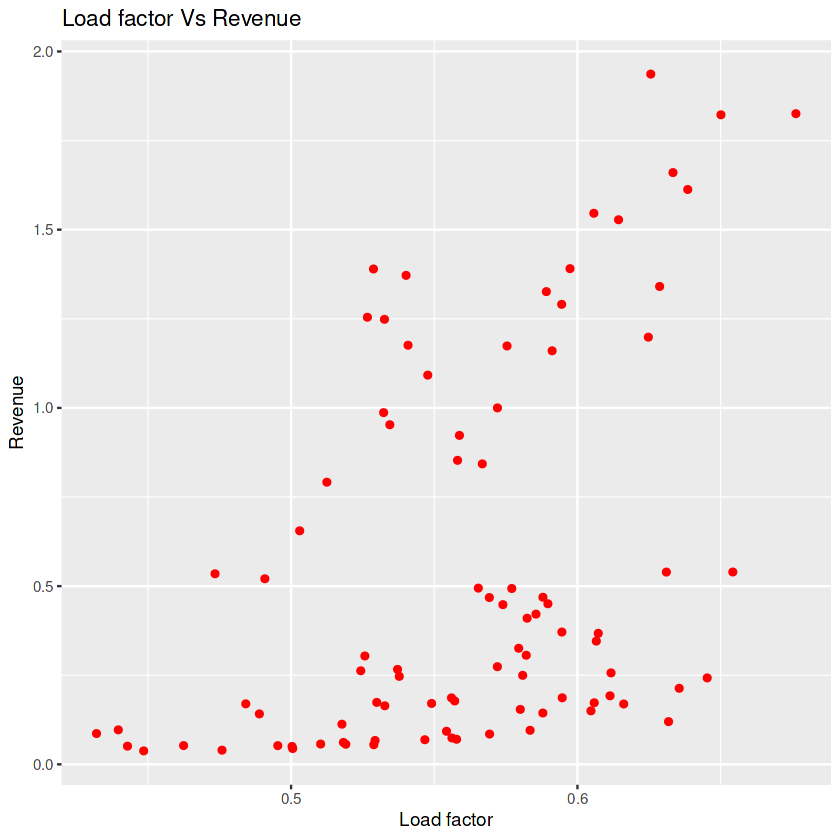

In [13]:
ggplot() +  geom_point(aes(airlines_data$LF, airlines_data$Q),colour = 'red') + ggtitle('Load factor Vs Revenue') + 
xlab('Load factor') + ylab('Revenue')

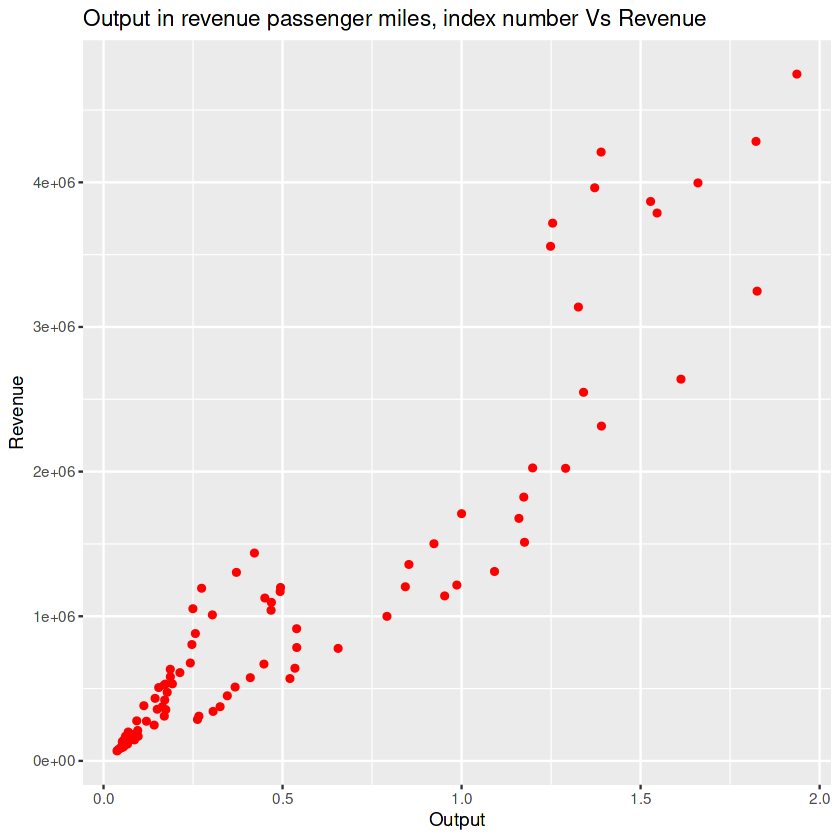

In [14]:
ggplot() + geom_point(aes(airlines_data$Q, airlines_data$C), colour = 'red') + ggtitle('Output in revenue passenger miles, index number Vs Revenue') + xlab('Output') + ylab('Revenue')

### Coplot

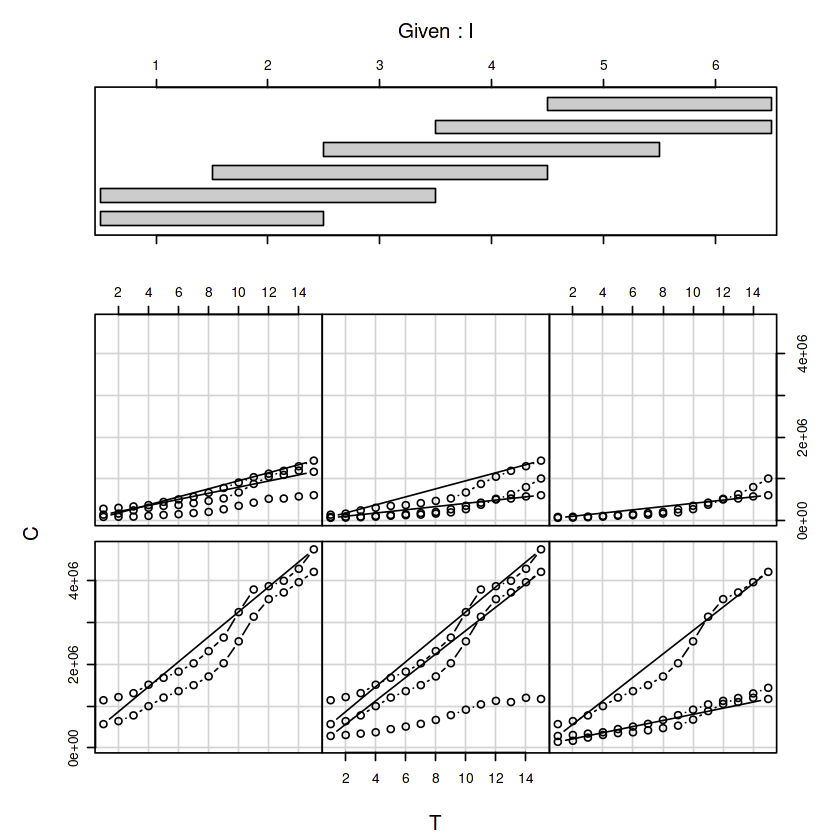

In [15]:
coplot( C~ T|I, type="b", data=airlines_data)

### Panel Data Analysis

Panel data estimation methods are statistical techniques used to analyze data with observations for the same entities (e.g., firms, countries) over multiple time periods. These methods leverage the strengths of both cross-sectional and time series data, offering advantages over analyzing them separately. Here's a brief introduction to some common panel data estimation methods:

##### Pooled Ordinary Least Squares (OLS): 

This is the simplest approach, treating the panel data as a pooled cross-sectional dataset.
It assumes that the relationship between variables is the same across all entities and over time.
While easy to implement, pooled OLS can be inefficient and lead to biased estimates if there is heterogeneity (differences) across entities or over time.

##### Fixed Effects Model:

This method addresses heterogeneity across entities by including dummy variables for each entity (except for a reference category).
It essentially removes the effect of time-invariant (unchanging over time) unobserved characteristics from the estimates.
Fixed effects are useful for studying within-unit effects (how variables change within an entity over time).
However, they cannot estimate the effects of time-invariant variables included as explanatory variables.

##### Random Effects Model:

This method assumes that the unobserved effects are random and uncorrelated with the explanatory variables.
It accounts for heterogeneity by including a random error term that varies across entities.
Random effects are useful for estimating average effects across entities.
They can be more efficient than fixed effects models when the focus is on average effects and the unobserved effects are random.

##### First Differenced Model:

This approach removes time-invariant unobserved effects by differencing the data (subtracting the previous period's value from each observation).
It focuses on the changes in variables over time within entities.
However, it can lead to a loss of information about the level effects (absolute values of variables).

##### Instrumental Variables (IV) Estimators:

These methods can be used to address issues like endogeneity (correlation between explanatory variables and the error term) that can plague other panel data models.
IV involves using an instrumental variable that is correlated with the explanatory variable of interest but not with the error term.

In [16]:
library(plm)


Attaching package: ‘plm’


The following objects are masked from ‘package:dplyr’:

    between, lag, lead




In [17]:
pooled_ols <-plm(C ~ Q+PF+LF, data =airlines_data, model = "pooling")
summary(pooled_ols)

Pooling Model

Call:
plm(formula = C ~ Q + PF + LF, data = airlines_data, model = "pooling")

Balanced Panel: n = 6, T = 15, N = 90

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-520654 -250270   37333  208690  849700 

Coefficients:
               Estimate  Std. Error t-value  Pr(>|t|)    
(Intercept)  1.1586e+06  3.6059e+05  3.2129   0.00185 ** 
Q            2.0261e+06  6.1807e+04 32.7813 < 2.2e-16 ***
PF           1.2253e+00  1.0372e-01 11.8138 < 2.2e-16 ***
LF          -3.0658e+06  6.9633e+05 -4.4027 3.058e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    1.2647e+14
Residual Sum of Squares: 6.8177e+12
R-Squared:      0.94609
Adj. R-Squared: 0.94421
F-statistic: 503.118 on 3 and 86 DF, p-value: < 2.22e-16

The model explains a significant portion of the variance in total cost (R-squared = 0.946, Adj. R-squared = 0.944).

All three independent variables have a statistically significant (p-value < 0.05) impact on total cost:
Revenue passenger miles (Q) has a strong positive relationship with cost. An increase in Q is associated with an increase in total cost.

Price of fuel (PF) has a positive relationship with cost. An increase in fuel price leads to an increase in total cost.

Load factor (LF) has a negative relationship with cost. A higher load factor (better capacity utilization) is associated with lower total cost.

The F-statistic (503.118) and its p-value (< 2.22e-16) indicate that the model significantly improves the prediction of total cost compared to a model with only an intercept.
The residuals range from -520,654 to 849,700, indicating some variability in the model's fit.
Limitations:

Pooled OLS assumes the same relationships between variables hold true for all airlines across all time periods. This might not capture potential heterogeneity (differences) in cost structures across airlines or over time.

This pooled OLS model suggests that revenue passenger miles, fuel price, and load factor are all important factors influencing airline total costs. However, it's essential to consider potential limitations like the assumption of homogeneity before drawing definitive conclusions.

In [18]:
fixed.lsdum <-lm(C ~ Q + PF + LF + factor(I)-1, data =airlines_data)
summary(fixed.lsdum)


Call:
lm(formula = C ~ Q + PF + LF + factor(I) - 1, data = airlines_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-551783 -159259    1796  137226  499296 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
Q           3.319e+06  1.714e+05  19.369  < 2e-16 ***
PF          7.731e-01  9.732e-02   7.944 9.70e-12 ***
LF         -3.797e+06  6.138e+05  -6.187 2.37e-08 ***
factor(I)1 -1.312e+05  3.508e+05  -0.374 0.709286    
factor(I)2  4.705e+05  3.091e+05   1.522 0.131839    
factor(I)3  1.206e+06  3.324e+05   3.628 0.000497 ***
factor(I)4  1.646e+06  3.183e+05   5.172 1.64e-06 ***
factor(I)5  1.697e+06  3.348e+05   5.069 2.48e-06 ***
factor(I)6  1.575e+06  3.073e+05   5.126 1.98e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 210400 on 81 degrees of freedom
Multiple R-squared:  0.985,	Adjusted R-squared:  0.9834 
F-statistic:   593 on 9 and 81 DF,  p-value: < 2.2e-16


least squares dummy variable model estimated using the lm function (likely in R). It analyzes the relationship between total cost (C) of airlines and several factors:

Revenue passenger miles (Q)

Price of fuel (PF)

Load factor (LF)

Airline (I) - This is included as a categorical variable using factor notation

##### Key Findings:

The model explains a very high proportion of the variance in total cost (R-squared = 0.985, Adj. R-squared = 0.983).

All three main effects (Q, PF, and LF) have a statistically significant (p-value < 0.05) impact on total cost:

Revenue passenger miles (Q) has a strong positive relationship with cost, similar to the pooled OLS model.

Price of fuel (PF) has a positive relationship with cost, again consistent with the previous model.

Load factor (LF) has a negative relationship with cost, indicating lower total cost with higher capacity utilization.

The coefficients for the airline dummy variables (factor(I)2 to factor(I)6) are mostly significant, suggesting that there are statistically significant differences in total cost between some airlines (compared to the baseline airline represented by factor(I)1).

Interpretation of Airline Effects:

The coefficient for factor(I)1 is not significant, likely because it represents the intercept term for the baseline airline category.

Airlines 3, 4, 5, and 6 (represented by factor(I)3 to factor(I)6) have significantly higher total costs compared to the baseline airline (factor(I)1) based on the positive and significant coefficients.

Airline 2 (factor(I)2) has a coefficient that is not statistically significant from zero. This suggests its cost structure might be similar to the baseline airline on average, although there might be some variability.

This model addresses heterogeneity across airlines by including dummy variables, but it doesn't account for heterogeneity over time.


This model provides a more nuanced view by allowing for different cost structures across airlines.

The R-squared value is slightly higher, indicating a potentially better fit compared to the pooled OLS model that assumed homogeneity across airlines.


This least squares dummy variable model confirms the findings of the pooled OLS model regarding the impact of revenue passenger miles, fuel price, and load factor on total cost. However, it goes a step further by revealing significant cost differences between some airlines. This suggests potential variations in airline efficiency, fleet composition, or other factors influencing cost structures.

In [19]:
fixed <- plm(C ~ Q + PF + LF,data =airlines_data,model ="within")
summary(fixed)

Oneway (individual) effect Within Model

Call:
plm(formula = C ~ Q + PF + LF, data = airlines_data, model = "within")

Balanced Panel: n = 6, T = 15, N = 90

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-551782.9 -159258.6    1796.2  137225.9  499296.1 

Coefficients:
      Estimate  Std. Error t-value  Pr(>|t|)    
Q   3.3190e+06  1.7135e+05 19.3694 < 2.2e-16 ***
PF  7.7307e-01  9.7319e-02  7.9437 9.698e-12 ***
LF -3.7974e+06  6.1377e+05 -6.1869 2.375e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    5.0776e+13
Residual Sum of Squares: 3.5865e+12
R-Squared:      0.92937
Adj. R-Squared: 0.92239
F-statistic: 355.254 on 3 and 81 DF, p-value: < 2.22e-16

This is the output from a Fixed Effects Within model estimated using the plm function (likely in R). It focuses on the within-unit effects of revenue passenger miles (Q), price of fuel (PF), and load factor (LF) on total cost (C) of airlines in a panel dataset.

##### Key Findings:

The model explains a significant portion of the variance in cost within airlines over time (R-squared = 0.929, Adj. R-squared = 0.922).

All three independent variables have a statistically significant (p-value < 0.05) impact on total cost within airlines:

Revenue passenger miles (Q) has a strong positive relationship with cost. An increase in Q within an airline over time is associated with an increase in its total cost.

Price of fuel (PF) has a positive relationship with cost. A rise in fuel price leads to a rise in total cost within an airline over time.

Load factor (LF) has a negative relationship with cost. An improvement in load factor (better capacity utilization) within an airline over time is associated with a decrease in its total cost.

##### Interpretation:

This model focuses on how changes in Q, PF, and LF within an airline over the years affect its total cost. It removes the effect of time-invariant (unchanging) factors that might differ between airlines (e.g., fleet size, management style).

The significant coefficients indicate that airlines can potentially manage their costs by focusing on these variables. For instance, increasing revenue passenger miles while managing fuel efficiency and capacity utilization can help control costs within an airline over time.

##### Limitations:

Fixed effects models don't estimate the effects of time-invariant variables.

They might not be suitable if the unobserved effects are correlated with the explanatory variables.

##### Compared to Pooled OLS:

This model provides a more focused view on how factors change costs within airlines over time, controlling for unobserved heterogeneity between airlines.

The R-squared value is slightly lower compared to the pooled OLS model, which is expected as the fixed effects model removes the between-airline variation.

##### Overall:

The Fixed Effects Within model highlights the importance of revenue passenger miles, fuel price, and load factor in influencing airline cost dynamics within each airline over time. This information can be valuable for airlines in developing strategies to manage their costs effectively.

In [20]:
fixef(fixed)

1       2       3       4       5       6 
-131236  470497 1205944 1646356 1697016 1575238

The fixed effects results offer insights into the average cost differences between airlines after controlling for the effects of other variables included in the model. This can be helpful in understanding how factors specific to each airline (e.g., fleet composition, management practices) influence their cost structures.

In [21]:
pFtest(fixed,pooled_ols)


	F test for individual effects

data:  C ~ Q + PF + LF
F = 14.595, df1 = 5, df2 = 81, p-value = 3.467e-10
alternative hypothesis: significant effects


For comparison of the within and the pooling model for the individual effect we can use function pFtest().

The argument of pFtest () function is two objects, the first being a within model and the second a pooling model. The effects tested are either individual, time, or two ways, depending on the effects introduced in the within model.

For pFtest () we are considering

H0: Pooled OLS model is consistent

Ha: Fixed effect model is consistent


The output of pFtest () indicates the p-value is less than 5%, so we can reject the null hypothesis. Therefore, the fixed effect model is consistent

### Random Effects Model

A random effects model is a type of hierarchical linear model used in panel data analysis. It's a statistical technique that estimates the effects of variables while accounting for heterogeneity (differences) across entities (e.g., firms, countries) observed over multiple time periods.

Here's a breakdown of the key concepts and how they work together in a random effects model:

##### Heterogeneity in Panel Data:

Panel data offers advantages over analyzing cross-sectional or time series data alone. However, it can be challenging if there are unobserved differences between entities (e.g., different management styles in firms) that might influence the variables of interest. This is called heterogeneity.

##### The Random Effects Assumption:

A random effects model addresses heterogeneity by assuming that the unobserved effects are random and uncorrelated with the explanatory variables in the model.

In simpler terms, the random effects represent the average influence of these unobserved factors on the dependent variable, and this influence varies randomly across entities.

##### Model Structure:

A random effects model typically includes two levels:

Level 1 Model (Within-Entity Model): This represents the relationship between the dependent variable (Y) and the explanatory variables (X) for a single entity over time. It's similar to a standard linear regression model.

Level 2 Model (Between-Entity Model):  This captures the variation in the intercept (average value of Y) across entities. It includes a random effect term (ε_i) specific to each entity (i).

Here's a general formula for a random effects model:

Y_it = β₀ + β₁X_it + ε_i + u_it

Y_it: Dependent variable for entity i at time t
β₀: Overall intercept
β₁: Coefficient of the explanatory variable (X)
ε_i: Random effect specific to entity i (assumed to be normally distributed with mean 0)
u_it: Error term (assumed to be normally distributed with mean 0 and variance σ²)

##### Estimation Methods:

There are two common methods for estimating the parameters in a random effects model:

Generalized Least Squares (GLS): This method takes the random effects into account by adjusting the within-entity residuals.

Maximum Likelihood (ML):  This method estimates the model parameters that maximize the likelihood of observing the data.

##### Advantages of Random Effects Models:

Accounts for Heterogeneity: It provides a more accurate picture of the relationships between variables compared to models that ignore heterogeneity.

Efficient for Large Datasets: When you have a large number of entities with few time periods per entity, random effects models can be more efficient than fixed effects models.

Disadvantages of Random Effects Models:

Reliance on Assumptions: The validity of the results depends on the assumptions about the random effects being random and uncorrelated with the explanatory variables.

##### When to Use a Random Effects Model:

You're interested in estimating the average effects of the explanatory variables across all entities in the panel.

You suspect there is unobserved heterogeneity between entities, but it's not correlated with the explanatory variables.

You have a large number of entities with a relatively small number of time periods per entity.
Comparison with Fixed Effects Model:

Fixed Effects Model: This approach addresses heterogeneity by including a dummy variable for each entity (except for a reference category). It focuses on within-unit effects (how variables change within an entity over time). However, it cannot estimate the effects of time-invariant variables.

Random Effects Model: This approach estimates average effects across entities by assuming random effects. It can be more efficient than fixed effects when the focus is on average effects and the unobserved effects are random.

##### In Conclusion:

Random effects models are a valuable tool for analyzing panel data when there is unobserved heterogeneity between entities. By accounting for this heterogeneity, they provide more accurate estimates of the effects of variables compared to models that ignore it. However, it's crucial to consider the assumptions of the model and choose the appropriate estimation method based on your research question and data characteristics.

In [22]:
random_effects <- plm(C ~ Q+PF+LF,data =airlines_data, index = c("I","T"),model ="random")
summary(random_effects)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = C ~ Q + PF + LF, data = airlines_data, model = "random", 
    index = c("I", "T"))

Balanced Panel: n = 6, T = 15, N = 90

Effects:
                    var   std.dev share
idiosyncratic 4.428e+10 2.104e+05 0.793
individual    1.154e+10 1.074e+05 0.207
theta: 0.5486

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-535726 -238494   49890  207491  722934 

Coefficients:
               Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)  1.0743e+06  3.7747e+05  2.8461  0.004427 ** 
Q            2.2886e+06  1.0949e+05 20.9015 < 2.2e-16 ***
PF           1.1236e+00  1.0344e-01 10.8622 < 2.2e-16 ***
LF          -3.0850e+06  7.2568e+05 -4.2512 2.126e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    6.6198e+13
Residual Sum of Squares: 5.8721e+12
R-Squared:      0.91129
Adj. R-Squared: 0.9082
Chisq: 883.501 on 3 DF, p-value: < 2.22e-16

This output shows the results of a random effects model with Swamy-Arora transformation estimated using the plm function (likely in R). It analyzes the relationship between total cost (C) of airlines and three independent variables:

Revenue passenger miles (Q)
Price of fuel (PF)
Load factor (LF)

##### Key Findings:

The model explains a significant portion of the variance in total cost (R-squared = 0.911, Adj. R-squared = 0.908).

All three independent variables have a statistically significant (p-value < 0.05) impact on total cost:
Revenue passenger miles (Q) has a strong positive relationship with cost. An increase in Q is associated with an increase in total cost.

Price of fuel (PF) has a positive relationship with cost. A rise in fuel price leads to a rise in total cost.

Load factor (LF) has a negative relationship with cost. An improvement in load factor (better capacity utilization) is associated with a decrease in total cost.

##### Random Effects Analysis:

The "Effects" section provides insights into the variance components of the model.

Idiosyncratic variance (4.43e+10): This represents the unexplained variation within airlines over time (individual time effects).

Individual variance (1.15e+10): This captures the variation in average total cost across different airlines (between-airline effects).

Theta (0.5486): This is the proportion of the total variance explained by the individual effects (between-airline effects). In this case, 54.86% of the variance is due to differences between airlines, and the remaining 45.14% is due to idiosyncratic factors within airlines over time.

##### Interpretation:

This random effects model suggests that there are significant differences in average total cost between airlines (individual effects) after accounting for the effects of revenue passenger miles, fuel price, and load factor.

The Swamy-Arora transformation helps address potential serial correlation (dependence of errors over time) that might be present in panel data.

##### Limitations:

The validity of the results depends on the assumptions of the random effects model, including the normality and homoscedasticity (constant variance) of the error terms.

Random effects models cannot estimate the effects of time-invariant variables that are correlated with the explanatory variables.

##### Overall:

This random effects model with Swamy-Arora transformation provides a more nuanced view of cost drivers for airlines. It reveals not only the impact of key variables like revenue passenger miles, fuel price, and load factor on total cost, but also highlights the existence of significant cost differences between airlines. This information can be valuable for airlines in benchmarking their cost structures and identifying areas for improvement.

### HausMan Test

The Hausman test, named after economist Jerry Hausman, is a statistical hypothesis test used in econometrics to compare the efficiency of two estimators for a model. It's particularly useful in the context of panel data analysis, where we have data for the same entities (e.g., firms, countries) observed over multiple time periods.

Here's a breakdown of the Hausman test and its hypotheses:

##### When to Use the Hausman Test:

The Hausman test is typically used to decide between two estimators for a panel data model:

Fixed Effects (FE) Model: This model addresses heterogeneity (differences) between entities by including a dummy variable for each entity (except for a reference category). It focuses on within-unit effects (how variables change within an entity over time).

Random Effects (RE) Model: This model assumes the unobserved effects are random and uncorrelated with the explanatory variables. It estimates average effects across entities.

The Choice Between FE and RE:

RE Model: More efficient if the unobserved effects are truly random and uncorrelated with the explanatory variables.

FE Model: Consistent (reliable) even if the unobserved effects are correlated with the explanatory variables, but it can be less efficient.

The Hausman Test Helps Decide:

The Hausman test helps us decide which model (FE or RE) is more appropriate based on the efficiency assumption.

Null Hypothesis (H₀):

The null hypothesis of the Hausman test states that the random effects model is efficient. In other words, the unobserved effects are random and uncorrelated with the explanatory variables.

Alternative Hypothesis (Hₐ):

The alternative hypothesis states that the random effects model is not efficient. This could be because the unobserved effects are correlated with the explanatory variables, making the random effects estimates biased.

Test Statistic and Decision Rule:

The Hausman test statistic is based on the difference between the coefficients estimated from the FE and RE models. A statistically significant test statistic (usually a high chi-square value with a low p-value) leads us to reject the null hypothesis. This suggests that the random effects model is not efficient, and the fixed effects model is likely the preferred choice.

Important Points:

A non-significant Hausman test result (often indicated by a high p-value) suggests that the random effects model might be a good choice due to its efficiency. However, it doesn't guarantee that the random effects assumptions are perfectly met.

The Hausman test is a valuable tool for choosing between FE and RE models, but it's not the only factor to consider. You should also examine the theoretical underpinnings of your model and potential limitations of each approach.

Overall:

The Hausman test provides a statistical framework for choosing between fixed effects and random effects models in panel data analysis. By understanding the hypotheses and the decision rule, you can make informed decisions about which model is more appropriate for your research question and data.

In [23]:
phtest(fixed, random_effects)


	Hausman Test

data:  C ~ Q + PF + LF
chisq = 60.87, df = 3, p-value = 3.832e-13
alternative hypothesis: one model is inconsistent


The Hausman test results you provided suggest that the random effects model might not be the most appropriate choice for your panel data analysis of cost (C) as a function of revenue passenger miles (Q), price of fuel (PF), and load factor (LF). Here's a breakdown of the results and their implications:

Chi-square statistic (chisq) = 60.87: This value is relatively high, indicating a potential difference between the fixed effects and random effects estimates.

Degrees of freedom (df) = 3: This represents the number of explanatory variables in your model (excluding the intercept).

p-value = 3.832e-13: This is an extremely small p-value, which means we can reject the null hypothesis of the Hausman test with very high confidence (usually below 0.05).

Interpretation:

Since we reject the null hypothesis (p-value < 0.05), the evidence suggests that the random effects model might be inconsistent. This implies there's a possibility that the unobserved effects in your model (factors influencing cost that are not explicitly included) are correlated with the explanatory variables (Q, PF, LF).

When unobserved effects are correlated with the explanatory variables, the random effects estimates can be biased.

Possible Reasons for Inconsistency:

There might be omitted variables in the model that are correlated with the unobserved effects and the explanatory variables. For example, airline management style or fleet composition could influence both total cost and be relatively stable over time (acting like unobserved effects).

The random effects assumption of uncorrelated effects might not hold for your data.

Recommendations:

Based on these results, the fixed effects model is likely the preferred choice for your analysis. Fixed effects models are more robust to violations of the random effects assumptions, although they can be less efficient.

You might also consider exploring the reasons behind the inconsistency. Are there relevant omitted variables you could potentially include in the model?

Overall:

The Hausman test results indicate that the random effects model might not be reliable in this case. The fixed effects model is a more suitable option to address the potential correlation between unobserved effects and the explanatory variables in your model. However, it's essential to consider the trade-offs between efficiency and robustness when choosing an estimator for your panel data analysis.

### Heteroskedasticity in Panel Data

Heteroskedasticity refers to a violation of the assumption of homoscedasticity in regression analysis. Homoscedasticity means that the variance of the error term (the difference between the actual value and the predicted value) is constant across all observations in the data. Heteroskedasticity occurs when the variance of the error term is not constant, but instead varies across different groups or levels in the data.

In panel data analysis, where we have observations for the same entities (e.g., countries, firms) over multiple time periods, heteroskedasticity can manifest in two ways:

Cross-sectional Heteroskedasticity: The variance of the error term might differ across entities (e.g., some airlines might have consistently higher or lower variability in costs compared to others).

Time-series Heteroskedasticity: The variance of the error term might change over time within an entity (e.g., an airline's cost fluctuations might be higher in some years compared to others).

##### Consequences of Heteroskedasticity:

Inefficient Estimates: When the error term is not homoscedastic, the coefficient estimates in the model might be inefficient, meaning they have larger variances than they would under homoscedasticity. This can make it harder to draw accurate conclusions about the relationships between variables.

Hypothesis Testing Issues: The p-values calculated for hypothesis testing might not be reliable, leading to misinterpretations of the significance of the estimated effects.

Tests for Heteroskedasticity in Panel Data:

Here are some common tests used to detect heteroskedasticity in panel data:

Breusch-Pagan Test: This test is a popular option for detecting cross-sectional heteroskedasticity. It utilizes the squared residuals from the model to assess whether the variance differs significantly across entities.

Wald Test: This test can be used to detect both cross-sectional and time-series heteroskedasticity. It involves regressing the squared residuals from the model on the explanatory variables and their interactions with time dummies.

Score Test: Similar to the Wald test, the score test also uses the squared residuals but employs a different test statistic to assess heteroskedasticity.

LM Test (Lagrange Multiplier Test): This test is another option for detecting both types of heteroskedasticity. It focuses on the Lagrange multiplier statistic derived from the regression of the squared residuals on the explanatory variables and their interactions with time dummies.

##### Choosing the Right Test:

The choice of test often depends on the specific research question and data characteristics. Some tests might be more powerful than others for detecting certain types of heteroskedasticity.  Here's a general guideline:

Breusch-Pagan Test: A good starting point for checking cross-sectional heteroscedasticity.

Wald Test or Score Test: More general tests that can detect both cross-sectional and time-series heteroskedasticity.

LM Test: Another option for detecting both types of heteroskedasticity.

##### Addressing Heteroskedasticity:

If a test indicates the presence of heteroskedasticity, there are several approaches to address it:

Weighted Least Squares (WLS): This method assigns weights to each observation based on the estimated variance of the error term. This can help to improve the efficiency of the estimates.

Robust Standard Errors: Even if the original estimates are inefficient, robust standard errors can be calculated to provide more reliable p-values for hypothesis testing. These methods are often available in statistical software packages.

Alternative Model Specifications: In some cases, transforming the dependent variable or using a different model structure (e.g., generalized least squares) can help to alleviate heteroskedasticity.

##### Conclusion:

Heteroskedasticity can be a concern in panel data analysis as it can affect the reliability of the results. By understanding the different types of heteroskedasticity and using appropriate tests to detect it, you can take steps to address this issue and ensure the validity of your findings.

In [24]:
lmMod <- lm(C ~ Q+PF+LF+factor(I)+factor(T), data=airlines_data)

In [25]:
lmMod


Call:
lm(formula = C ~ Q + PF + LF + factor(I) + factor(T), data = airlines_data)

Coefficients:
(Intercept)            Q           PF           LF   factor(I)2   factor(I)3  
 -7.921e+05    3.416e+06    1.515e+00   -2.927e+06    6.806e+05    1.435e+06  
 factor(I)4   factor(I)5   factor(I)6   factor(T)2   factor(T)3   factor(T)4  
  1.929e+06    1.969e+06    1.892e+06    1.418e+04   -1.844e+03   -8.009e+04  
 factor(T)5   factor(T)6   factor(T)7   factor(T)8   factor(T)9  factor(T)10  
 -5.035e+04   -1.293e+05   -2.107e+05   -2.800e+05   -3.495e+05   -5.956e+05  
factor(T)11  factor(T)12  factor(T)13  factor(T)14  factor(T)15  
 -7.112e+05   -7.294e+05   -6.856e+05   -6.780e+05   -5.991e+05  


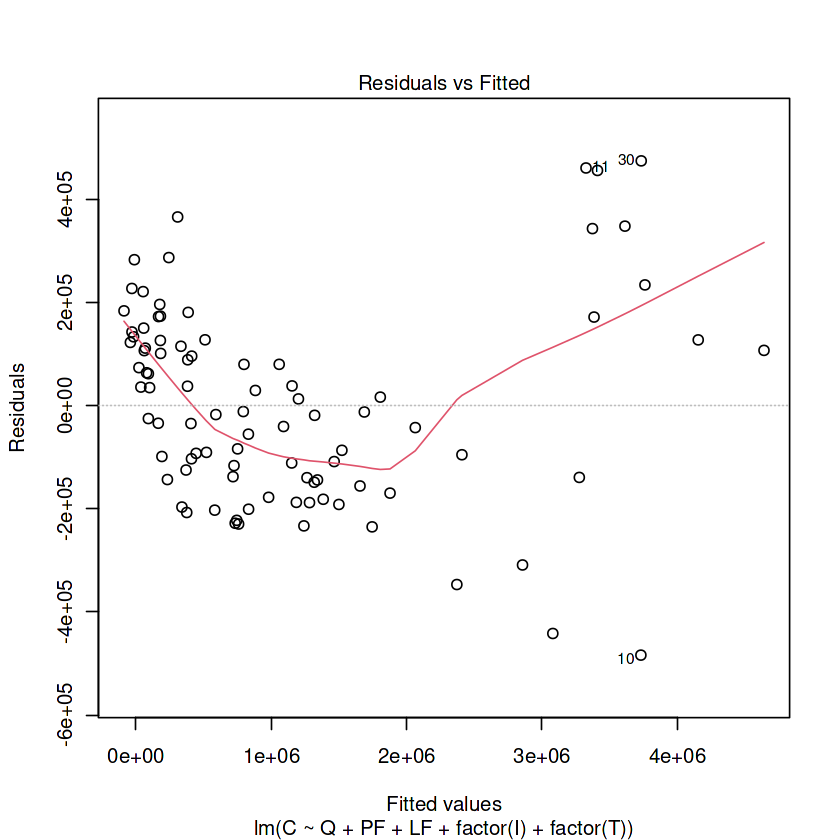

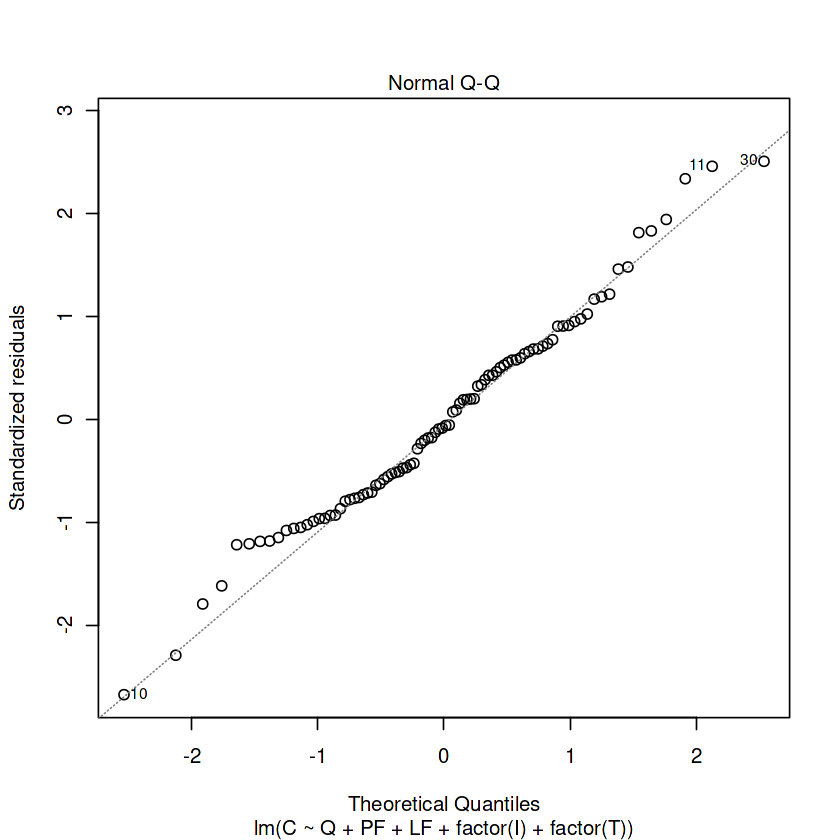

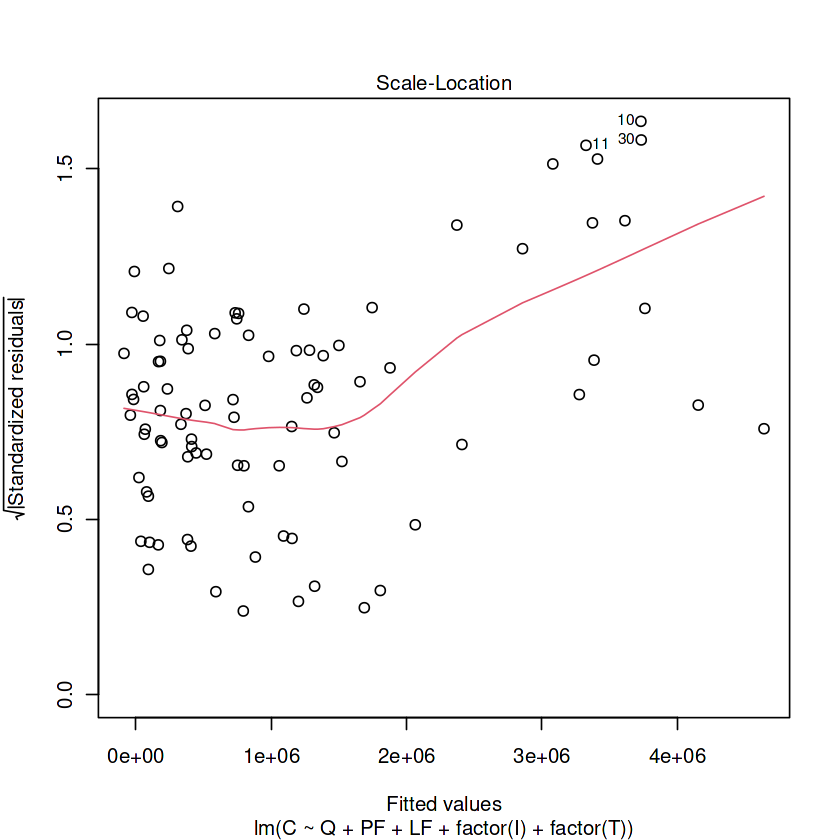

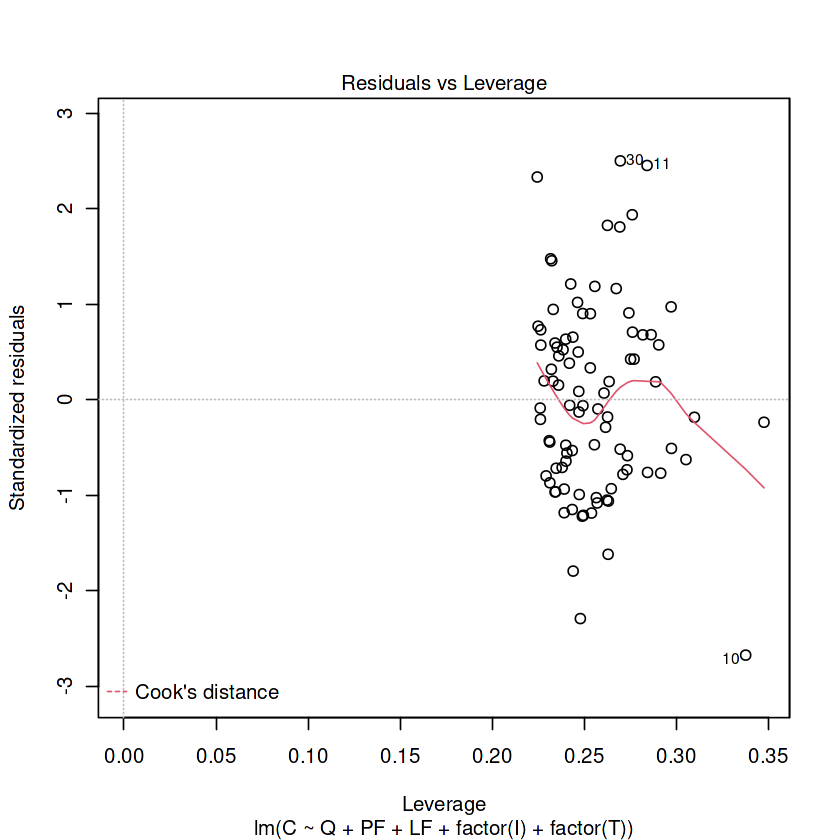

In [26]:
plot(lmMod)

The plots we are interested in are residuals vs fitted values and standardised residuals on Y axis. If there is absolutely no heteroscedastity, you should see a completely random, equal distribution of points throughout the range of X axis and a flat red line.

But in our case, as you can notice from the residuals vs fitted values plot, the red line is slightly curved and the residuals seem to increase as the fitted Y values increase. So, the inference here is, heteroscedasticity exists.

In [27]:
library(lmtest)
bptest(C ~ Q+PF+LF+factor(I)+factor(T), data=airlines_data, studentize=F)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	Breusch-Pagan test

data:  C ~ Q + PF + LF + factor(I) + factor(T)
BP = 46.168, df = 22, p-value = 0.001881


##### Interpretation of the Results:

BP = 46.168: This is the Breusch-Pagan test statistic. A higher value suggests a stronger possibility of heteroskedasticity.

df = 22: These are the degrees of freedom associated with the test statistic, which depend on the number of explanatory variables in the model (excluding the intercept and factor variables).

p-value = 0.001881: This is a very low p-value (typically less than 0.05 is considered significant). It indicates that we can reject the null hypothesis of homoscedasticity (constant variance) with high confidence.

##### Inference:

Since the p-value is very low, we can conclude that there is evidence of cross-sectional heteroskedasticity in your model. This means the variance of the error terms is likely not constant across airlines. There could be some airlines with consistently higher or lower variability in costs compared to others.

### Box Cox Transformation

The Box-Cox transformation, also known as the power transformation, is a statistical technique used to address non-normality and improve the normality of a skewed continuous variable in regression analysis. It achieves this by transforming the data using a power function.

Here's a breakdown of the Box-Cox transformation:

When to Use Box-Cox Transformation:

This transformation is particularly useful when the residuals from a regression model exhibit non-normality, which can violate assumptions of some statistical tests. Non-normality can manifest as data skewed to the left (negative skew) or right (positive skew).

Additionally, the Box-Cox transformation can be helpful if the variance of the data is not constant (heteroskedasticity).

The Transformation Process:

The Box-Cox transformation applies a power function (lambda, λ) to the data:

y(lambda) = (x^λ - 1) / λ  for λ ≠ 0
         = ln(x)           for λ = 0
x: Original data value
y(lambda): Transformed data value
λ: The power transformation parameter
The value of lambda can take on different values, including negative numbers and zero. The optimal lambda is chosen based on which transformation achieves the closest fit to a normal distribution.

Finding the Optimal Lambda:

Several methods are used to find the optimal lambda value:

Log-likelihood function: This method involves maximizing the log-likelihood function of the transformed data. The lambda that maximizes the log-likelihood is considered optimal.

Residual plots: Examining plots of transformed residuals against fitted values or normal quantile plots can help visually assess normality for different lambda values.

Benefits of Box-Cox Transformation:

Improved Normality: By transforming the data, the Box-Cox transformation can help achieve a closer fit to a normal distribution, which is an assumption for many statistical tests.

Reduced Heteroskedasticity: In some cases, the transformation can also help stabilize the variance of the data, addressing heteroskedasticity.

Limitations:

Zero Values: The transformation cannot be applied directly to data containing zero values. Adjustments might be needed to handle zeros before applying the transformation.

Interpretation: After applying the Box-Cox transformation, the interpretation of the coefficients in the regression model might change. You might need to back-transform the coefficients or use specialized interpretations for power-transformed variables.

Overall:

The Box-Cox transformation is a valuable tool for dealing with non-normality and heteroskedasticity in regression analysis. By transforming the data, it can improve the validity of statistical tests and potentially lead to more reliable results. However, it's crucial to consider the limitations and interpret the results of the transformed model appropriately.

In [28]:
distBCMod <- caret::BoxCoxTrans(airlines_data$C)
print(distBCMod)

Box-Cox Transformation

90 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  68978  292046  637001 1122524 1345968 4748320 

Largest/Smallest: 68.8 
Sample Skewness: 1.49 

Estimated Lambda: 0 
With fudge factor, Lambda = 0 will be used for transformations



In [29]:
airlines_data <- cbind(airlines_data, C_new=predict(distBCMod, airlines_data$C)) 
head(airlines_data)

,I,T,C,Q,PF,LF,C_new
,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,1,1,1140640,0.952757,106650,0.534487,13.94710
2,1,2,1215690,0.986757,110307,0.532328,14.01082
3,1,3,1309570,1.091980,110574,0.547736,14.08521
4,1,4,1511530,1.175780,121974,0.540846,14.22863
5,1,5,1676730,1.160170,196606,0.591167,14.33236
6,1,6,1823740,1.173760,265609,0.575417,14.41640


In [30]:
lmMod_bc <- lm(C_new ~ Q+PF+LF+factor(I)+factor(T), data=airlines_data)
bptest(lmMod_bc)


	studentized Breusch-Pagan test

data:  lmMod_bc
BP = 40.186, df = 22, p-value = 0.01028


Studentized Breusch-Pagan Test:

This is a variant of the Breusch-Pagan test that uses a studentized test statistic to assess cross-sectional heteroskedasticity. It can be more robust than the original Breusch-Pagan test in some situations.

It continues to assess whether the variance of the error terms (the difference between actual and predicted values) differs significantly across entities (airlines in this case).

Interpretation of the Results:

BP = 40.186: This is the Breusch-Pagan test statistic (studentized version).
df = 22: These are the degrees of freedom associated with the test statistic.
p-value = 0.01028: This is a low p-value (typically less than 0.05 is considered significant). It indicates that we can reject the null hypothesis of homoscedasticity (constant variance) with some confidence.

Inference:

Since the p-value is low, we can conclude that there is no evidence of cross-sectional heteroskedasticity at 1% significance in your model after applying the Box-Cox transformation to the cost variable. This means the variance of the error terms is likely constant across airlines.

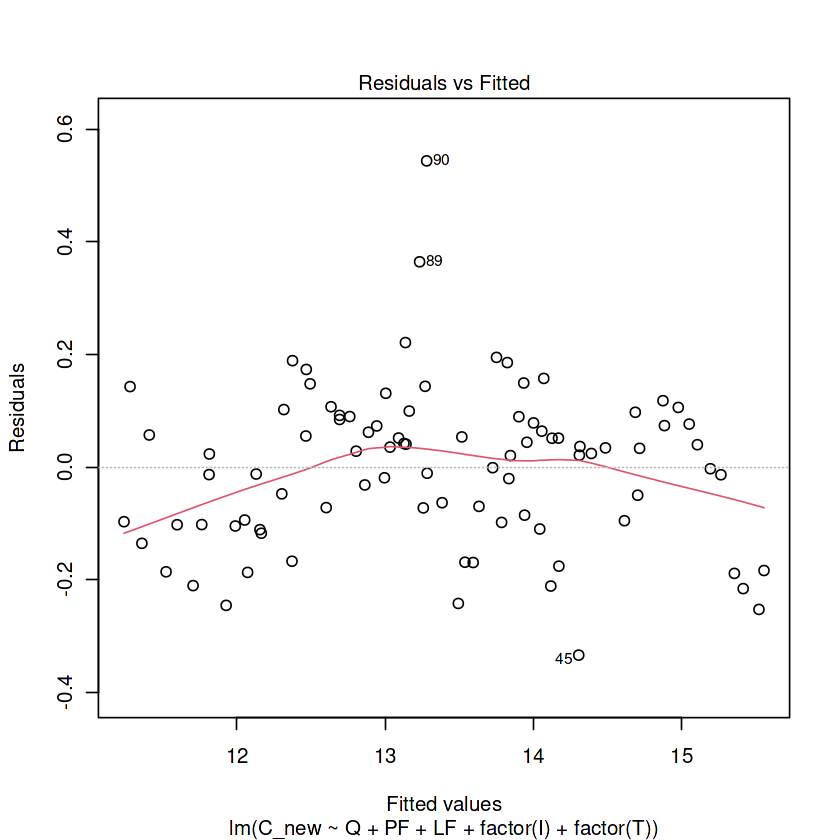

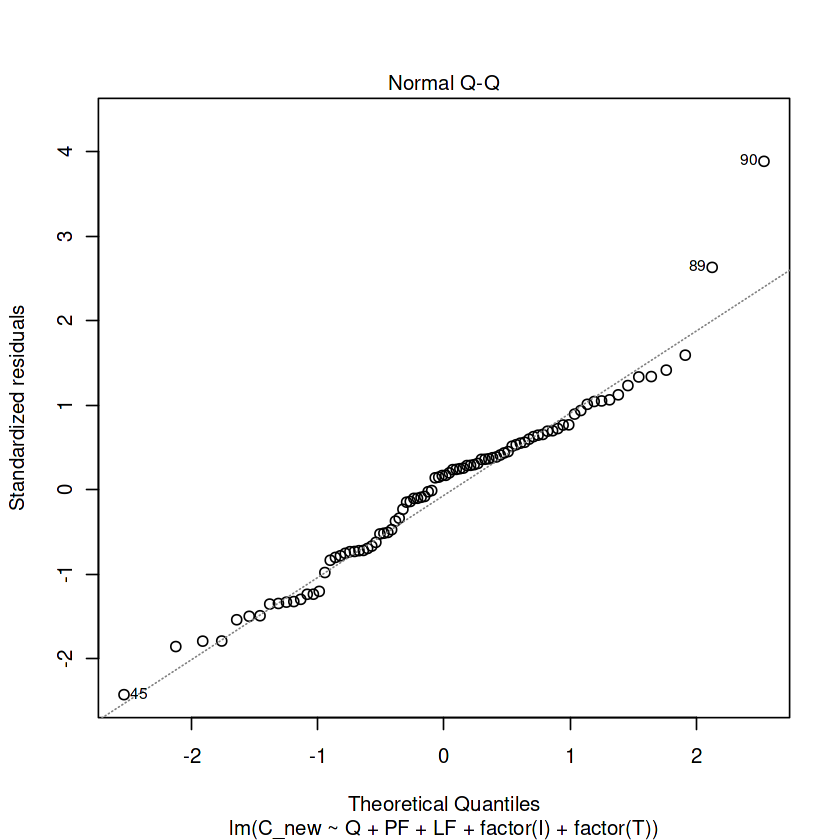

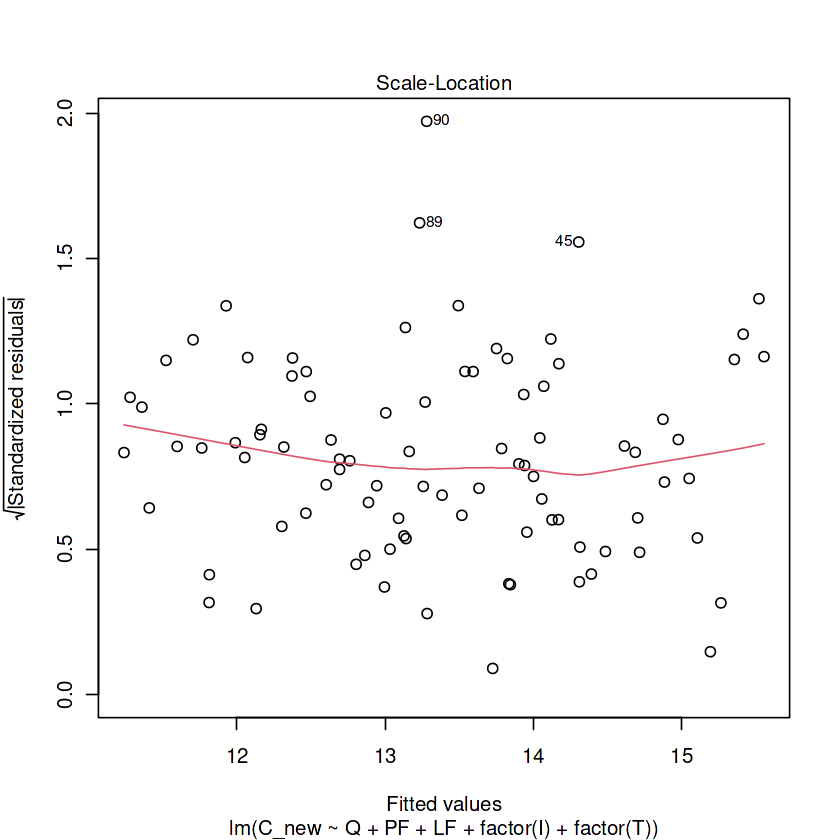

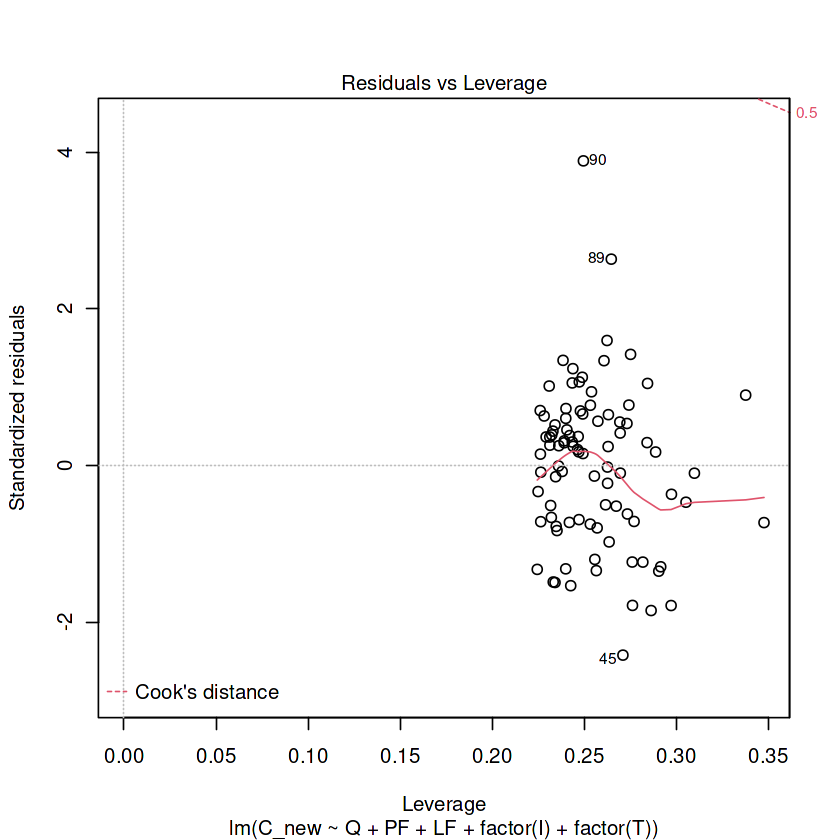

In [31]:
plot(lmMod_bc)

In [32]:
coeftest(fixed)


t test of coefficients:

      Estimate  Std. Error t value  Pr(>|t|)    
Q   3.3190e+06  1.7135e+05 19.3694 < 2.2e-16 ***
PF  7.7307e-01  9.7319e-02  7.9437 9.698e-12 ***
LF -3.7974e+06  6.1377e+05 -6.1869 2.375e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Interpretation of the Results:

All three coefficients (Q, PF, and LF) have statistically significant effects on the transformed cost variable at the 0.001 significance level (indicated by ***).

This means we can reject the null hypothesis (coefficient = 0) for all three variables with very high confidence.

Q (Revenue Passenger Miles): The positive and highly significant t-statistic (19.3694) indicates a strong positive relationship between revenue passenger miles and cost. An increase in revenue passenger miles is associated with an increase in transformed cost.

PF (Price of Fuel): The positive and highly significant t-statistic (7.9437) suggests a positive relationship between the price of fuel and cost. A rise in fuel price leads to an increase in transformed cost.

LF (Load Factor): The negative and highly significant t-statistic (-6.1869) implies a negative relationship between load factor and cost. An improvement in load factor (better capacity utilization) is associated with a decrease in transformed cost.

Overall Inference:

These results provide strong evidence that all three explanatory variables (revenue passenger miles, price of fuel, and load factor) have statistically significant effects on the transformed cost variable. The positive relationships with Q and PF and the negative relationship with LF are consistent with economic intuition.

In [33]:
coeftest(fixed, vcovHC)


t test of coefficients:

      Estimate  Std. Error t value Pr(>|t|)    
Q   3.3190e+06  1.5824e+05 20.9748  < 2e-16 ***
PF  7.7307e-01  2.6536e-01  2.9133  0.00462 ** 
LF -3.7974e+06  1.6161e+06 -2.3497  0.02122 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Interpretation of the Results:

All three coefficients (Q, PF, and LF) have statistically significant effects on the cost variable at different significance levels:

Q (Revenue Passenger Miles): The highly significant t-statistic (20.9748) and very low p-value (< 2e-16) indicate a strong positive relationship between revenue passenger miles and cost.

PF (Price of Fuel): The significant t-statistic (2.9133) and p-value (0.00462) suggest a positive relationship between the price of fuel and cost.

LF (Load Factor): The marginally significant t-statistic (-2.3497) and p-value (0.02122) imply a negative relationship between load factor and cost.

Key Points:

Using vcovHC helps address potential heteroskedasticity by providing robust standard errors, leading to more reliable p-values for the t-tests.

The results suggest statistically significant relationships between all three explanatory variables and the cost variable, with Q having the strongest effect. However, the interpretation of the coefficient magnitudes might be affected by the fixed-effects model structure, which focuses on within-entity changes.

In [34]:
coeftest(fixed, vcovHC(fixed, method = "arellano"))


t test of coefficients:

      Estimate  Std. Error t value Pr(>|t|)    
Q   3.3190e+06  1.5824e+05 20.9748  < 2e-16 ***
PF  7.7307e-01  2.6536e-01  2.9133  0.00462 ** 
LF -3.7974e+06  1.6161e+06 -2.3497  0.02122 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Code Breakdown:

coeftest: This function, as before, performs hypothesis tests for the coefficients in a fitted model object.

fixed: This likely represents your fitted model object, which could be a dynamic panel model estimated using a method like Arellano-Bond (AB) or GMM (Generalized Method of Moments).

vcovHC(fixed, method = "arellano"): This part specifies that you want to use a robust covariance matrix estimator with the Arellano-Bond method for calculating standard errors. This approach is helpful when dealing with potential serial correlation (dependence of errors over time) in dynamic panel models.

t-test Results:

The table summarizes the t-test statistics for each coefficient:

Estimate: The estimated coefficient value for each explanatory variable (revenue passenger miles (Q), price of fuel (PF), and load factor (LF)).

Std. Error: This shows the standard error of the estimated coefficient, calculated using the robust covariance matrix estimator with the Arellano-Bond method. This approach helps account for serial correlation.

t value: This is the t-statistic, which is calculated by dividing the coefficient estimate by its robust standard error.

Pr(>|t|): This is the p-value associated with the t-test. It represents the probability of observing a t-statistic as extreme or more extreme than the calculated value, assuming the null hypothesis is true (i.e., the coefficient is equal to zero).

Interpretation of the Results:

The results are very similar to the previous case with robust standard errors (vcovHC). All three coefficients (Q, PF, and LF) have statistically significant effects on the dependent variable at different significance levels:

Q (Revenue Passenger Miles): The highly significant t-statistic (20.9748) and very low p-value (< 2e-16) indicate a strong positive relationship between revenue passenger miles and cost.

PF (Price of Fuel): The significant t-statistic (2.9133) and p-value (0.00462) suggest a positive relationship between the price of fuel and cost.

LF (Load Factor): The marginally significant t-statistic (-2.3497) and p-value (0.02122) imply a negative relationship between load factor and cost.

Key Points:

Using vcovHC(fixed, method = "arellano") specifically addresses potential serial correlation, a common issue in dynamic panel models, leading to more reliable p-values for the t-tests.

The results suggest statistically significant relationships between all three explanatory variables and the dependent variable, with Q having the strongest effect. However, the interpretation of coefficient magnitudes might depend on the specific dynamic model you estimated (e.g., Arellano-Bond or GMM).

In [35]:
t(sapply(c("HC0", "HC1", "HC2", "HC3", "HC4"),
           function(x) sqrt(diag(vcovHC(fixed, method = "arellano", type = x)))))

,Q,PF,LF
HC0,158238.3,0.2653576,1616089
HC1,160943.4,0.2698939,1643716
HC2,162656.8,0.2714679,1669333
HC3,167246.8,0.2777873,1724638
HC4,166581.8,0.2765686,1733385
